<a href="https://colab.research.google.com/github/Pipe-13/InteligenciaArtificial/blob/main/US_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. LIBRERIAS

In [4]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


2. CARGA Y EXPLORACIÓN



In [10]:
# 2.1 Cargue de archivo
df = pd.read_csv('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL/Tweets.csv')
# 2.2 Seleccion de columnas
df = df[["text", "airline_sentiment"]]
# 2.3 Visualización
print(df.head())

                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative


/tmp/ipython-input-2995660797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline_sentiment", data=df, palette="Set3")


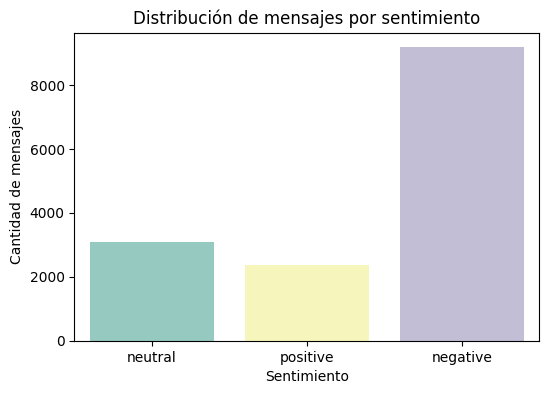

In [20]:
# 2.4 Visualizar la distribución de sentimientos
plt.figure(figsize=(6,4))
sns.countplot(x="airline_sentiment", data=df, palette="Set3")
plt.title("Distribución de mensajes por sentimiento")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de mensajes")
plt.show()

3. PREPARACIÓN Y VECTORIZACIÓN

In [19]:
# 3.1 Definir variables
X = df["text"]
y = df["airline_sentiment"]

# 3.2 Inicializar el CountVectorizer
vectorizer = CountVectorizer()

# 3.3  Ajustar y transformar x en matriz numerica
X_vectorized = vectorizer.fit_transform(X)
print("Dimensiones de la matriz:", X_vectorized.shape)

Dimensiones de la matriz: (14640, 15051)


4. DIVISIÓN Y ENTRENAMIENTO

In [23]:
# 4.1 División de datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)

# 4.2 Crear y entrenar el modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

print("Modelo entrenado correctamente")

Modelo entrenado correctamente


5. EVALUACIÓN

Exactitud del modelo: 0.7872267759562842


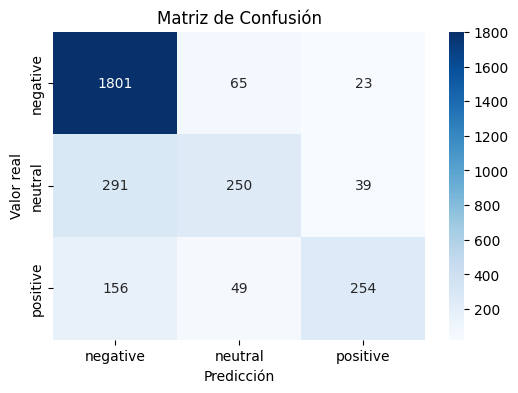

In [24]:
# 5.1 Predicciones sobre el set de prueba
y_pred = model.predict(X_test)

# 5.2 Calcular exactitud
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

# 5.3 Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["negative", "neutral", "positive"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()